In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

In [27]:
plt.style.use('ggplot')
np.random.seed(123)
#コンピュータで生成する乱数というのは完全にランダムなわけではなく、一定の計算に沿って生成されるものです。
#計算によって生成される乱数を「疑似乱数」と呼びます。
#疑似乱数は、乱数を発生させるための種になるものを使って計算されます。これをランダムシード（乱数種）と言います。
#乱数を発生させる前にnp.random.seed()と書いて、括弧内にランダムシードの追番を入力してやれば再現性を確保できます。（種を固定するという）
#何度乱数を発生させても、毎回同じ乱数が返ってきます。

In [28]:
NMC = 2000
#Number Monte Carlo 打つ座標の数
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
r = (xmc**2 + ymc**2)**0.5
#rが1以下つまり範囲に入ったならば、1、範囲からはずれたならば0を返してくれるnp.where
accept = np.where(r<=1, 1, 0)
#原点からの距離rが1以下ならそれは単位円の内側
accept_ratio = np.sum(accept) / NMC
print(accept_ratio)

0.782


In [29]:
NMC = 2000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
r = (xmc**2 + ymc**2)**0.5
@interact(mcs=(0,NMC,1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1,0.001)
    y = (1-x**2)**0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x,y,alpha=0.3)
    plt.fill_between(x,y,alpha=0.3)
    r = (xmc[:mcs]**2 + ymc[:mcs]**2)**0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    plt.scatter(xmc[:mcs], ymc[:mcs], color='black', marker='.')
    plt.show()
    print('Monte Carlo: ',accept_ratio)
    print('Analytical Solution:', np.pi / 4)

interactive(children=(IntSlider(value=0, description='mcs', max=2000), Output()), _dom_classes=('widget-intera…

In [30]:
pi_mcs = []
for mcs in range(1,NMC):
    r = (xmc[:mcs]**2 + ymc[:mcs]**2)**0.5
    accept = np.where(r<=1, 1, 0)
    accept_raito = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [31]:
pi_x = np.arange(len(pi_mcs)) + 1

Text(0, 0.5, 'accept ratio')

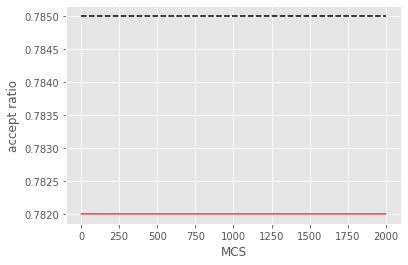

In [32]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles='dashed')
plt.xlabel('MCS')
plt.ylabel('accept ratio')

In [5]:
#デコレータとは？　関数の中に関数のような、関数をデコレートしてる状況をべつの形で表現したもの
#酒井さんの講座から抜粋
def print_info(func):
    def wrapper(*args, **kwargs):
        print('start')
        result = func(*args, **kwargs)
        print('end')
        return result
    return wrapper

#デコレーターを使わなくても同様に
f = print_info(add_num)
r3 = f(10, 20)
print(r3)

@print_info
def add_num(a, b):
    return a + b

r = add_num(10, 20)
print(r)

start
start
end
end
30
start
end
30


In [4]:
#デコレーターを使わなくても同様に
f = print_info(add_num)
r3 = f(10, 20)
print(r3)

start
start
end
end
30
